In [1]:
#General imports
import numpy as np
import matplotlib.pyplot as plt

#Astropy imports
from astropy import units as u 
from astropy import constants as const
from astropy.coordinates import SkyCoord

#Own-code import
from GOALS_dataframe.analytic_neutrino_flux import *


IceCube recently identified NGC 1068 as high-energy neutrino source at the evidence level [0]. In this notebook we use our framework to estimate the starburst-driven neutrino flux from NGC 1068 and compare it to the reported IceCube flux.

[0] : https://www.science.org/doi/10.1126/science.abg3395

In [2]:
def NGC1068_spectrum(energy,phi0,E0,gamma):
    return pow(energy,2)*phi0*pow(energy/E0,-gamma)

#phi0 is the flux normalization at 1 TeV
#gamma = 3.2 +- 0.2 is the best-fit flux

In [3]:
NGC1068_evidence = np.loadtxt("NGC1068_evidence_flux.txt")
NGC1068_evidence_x = [i[0] for i in NGC1068_evidence ]
NGC1068_evidence_y = [NGC1068_spectrum(energy=i*1e-3,
                                       phi0=5e-11,
                                       E0=1,
                                       gamma=3.2) for i in NGC1068_evidence_x ]
model_case_1 = [ 1e-3*Flux(i, 250, 500, 1000,150,4, 1e8, 0.52,15.9) for i in NGC1068_evidence_x]
model_case_2 = [ 1e-3*Flux(i, 250, 500, 1000,150,5.3, 1e8, 0.52,15.9) for i in NGC1068_evidence_x]

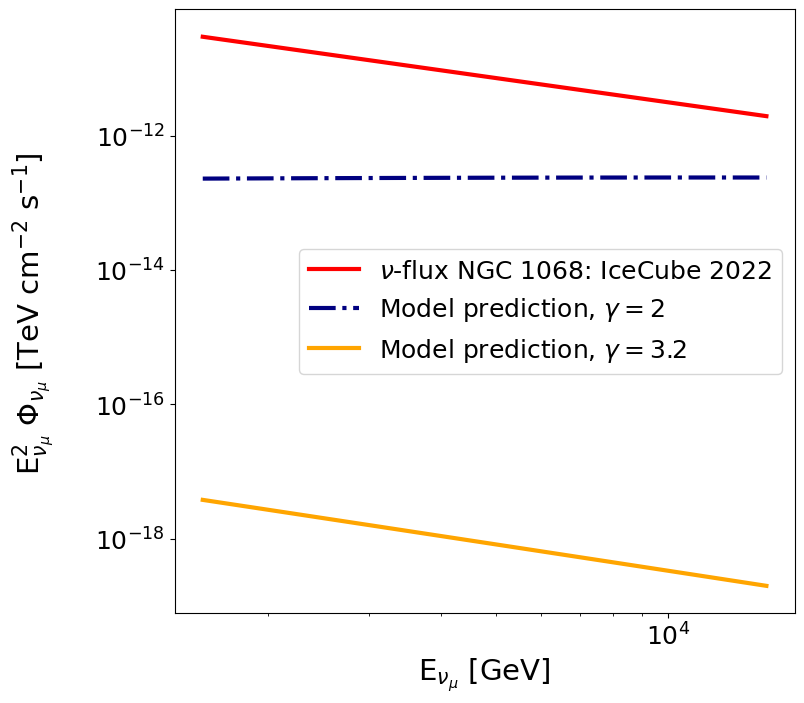

In [9]:
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(NGC1068_evidence_x,NGC1068_evidence_y,linewidth = 3,c='red',linestyle = '-', label = '$\\nu$-flux NGC 1068: IceCube 2022')

plt.plot(NGC1068_evidence_x,model_case_1, linewidth = 3,c='navy',linestyle = '-.',label = 'Model prediction, $\\gamma = 2$')
plt.plot(NGC1068_evidence_x,model_case_2,linewidth = 3,c='orange',label = 'Model prediction, $\\gamma = 3.2$')

plt.xlabel ("E$_{\\nu_\\mu}$ [GeV]", fontsize = 21)
plt.ylabel('E$_{\\nu_{\\mu}}^2$ $\\Phi_{\\nu_\\mu}$ [TeV cm$^{-2}$ s$^{-1}$] \n', fontsize = 21)
plt.legend(fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.xscale('log')
plt.yscale('log')

Conclusion: We predict a dominant contribution of the AGN present in NGC 1068, as the starburst-driven flux prediction of our model prediction is significantly lower than the flux of IceCube.

In [10]:
NGC1068_100 = Flux(1e3, 250, 500, 100,150,4, 1e8, 0.56,15.9)
NGC1068_1000 = Flux(1e3, 250, 500, 1000,150,4, 1e8, 0.56,15.9)
print("Neutrino flux ratio phi(100 cm-3)/phi(1000 cm-3) = " , NGC1068_100/NGC1068_1000)

Neutrino flux ratio phi(100 cm-3)/phi(1000 cm-3) =  0.4358702303437216
